<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/TIEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# specify the folder here
folder = '/content/drive/MyDrive/AnhAI/cacloaitien/'

photos, labels = list(), list()

for file in listdir(folder):
    output = None
    if file.startswith('5000vnd'):
        output = 0
    elif file.startswith('10000vnd'):
        output = 1
    elif file.startswith('20k'):
        output = 2
    elif file.startswith('50k'):
        output = 3
    elif file.startswith('100k'):
        output = 4
    elif file.startswith('500k'):
        output = 5
    if output is not None:
      photo = load_img(folder + file, target_size=(200, 200, 3))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)

photos = np.array(photos)
labels = np.array(labels)

photos= photos.astype('float32')/255

labels = to_categorical(labels,14)

save('//content/drive/MyDrive/AnhAI/cacloaitien/tien_photos.npy', photos)
save('/content/drive/MyDrive/AnhAI/cacloaitien/tien_labels.npy', labels)


model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

from keras.losses import categorical_crossentropy
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.8, nesterov= True)
model.compile(loss= categorical_crossentropy, optimizer= sgd, metrics = ['accuracy'])

train = model.fit(photos, labels, batch_size=64, epochs=80, verbose=1)

Epoch 1/80
3/3 [==============================] - 1s 172ms/step - loss: 2.6426 - accuracy: 0.0872
Epoch 2/80
3/3 [==============================] - 1s 170ms/step - loss: 2.3168 - accuracy: 0.2953
Epoch 3/80
3/3 [==============================] - 1s 174ms/step - loss: 2.0674 - accuracy: 0.3154
Epoch 4/80
3/3 [==============================] - 1s 181ms/step - loss: 1.9847 - accuracy: 0.3020
Epoch 5/80
3/3 [==============================] - 1s 182ms/step - loss: 1.9147 - accuracy: 0.2752
Epoch 6/80
3/3 [==============================] - 1s 177ms/step - loss: 1.8628 - accuracy: 0.2752
Epoch 7/80
3/3 [==============================] - 1s 179ms/step - loss: 1.8681 - accuracy: 0.2349
Epoch 8/80
3/3 [==============================] - 1s 174ms/step - loss: 1.8440 - accuracy: 0.2416
Epoch 9/80
3/3 [==============================] - 1s 170ms/step - loss: 1.8832 - accuracy: 0.2282
Epoch 10/80
3/3 [==============================] - 1s 169ms/step - loss: 1.8603 - accuracy: 0.2349
Epoch 11/80
3/3 [==

In [ ]:
model.evaluate(photos,labels)


5/5 [==============================] - 0s 34ms/step - loss: 0.2994 - accuracy: 0.9463


[0.29939597845077515, 0.9463087320327759]

In [ ]:
classes = ['5k','10k','20k','50k','100k','200k','500k']

1/1 [==============================] - 0s 29ms/step
[[4.0968000e-05 8.4992737e-01 1.0643171e-05 8.4368765e-02 5.4364048e-02
  1.1061750e-02 6.5200562e-05 7.2669118e-06 2.8910645e-05 8.3460334e-05
  2.7641915e-06 5.3622666e-06 1.6502618e-05 1.7155606e-05]]


'10k'

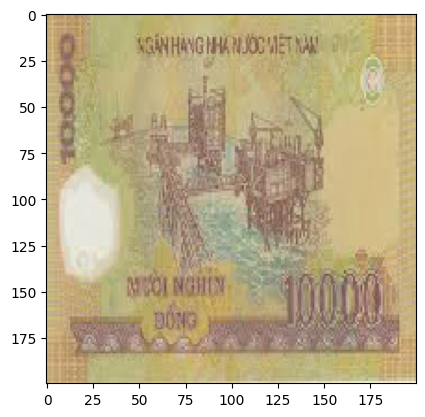

In [ ]:
img = load_img('/content/drive/MyDrive/AnhAI/cacloaitien/10000vnd (2).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 108ms/step


'200k'

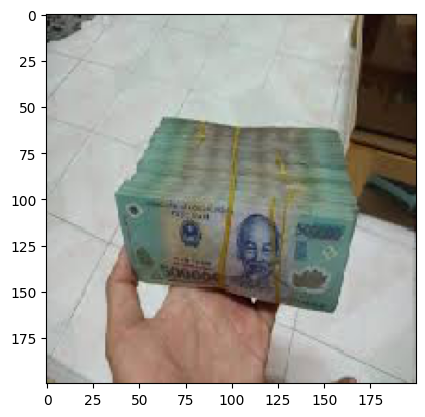

In [ ]:
img = load_img('/content/drive/MyDrive/AnhAI/cacloaitien/500k (60).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 21ms/step


'5k'

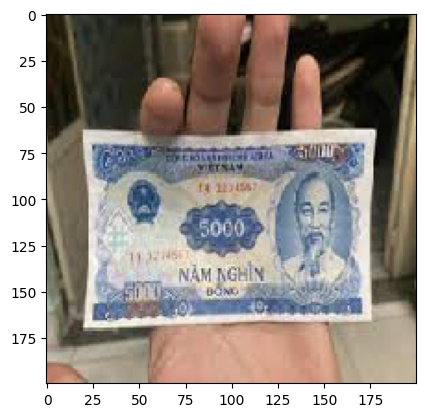

In [ ]:
img = load_img('/content/drive/MyDrive/AnhAI/cacloaitien/5000vnd (9).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 20ms/step


'100k'

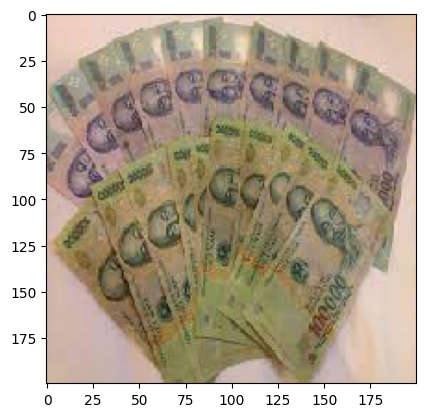

In [ ]:
img = load_img('/content/drive/MyDrive/AnhAI/cacloaitien/100k (3).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]